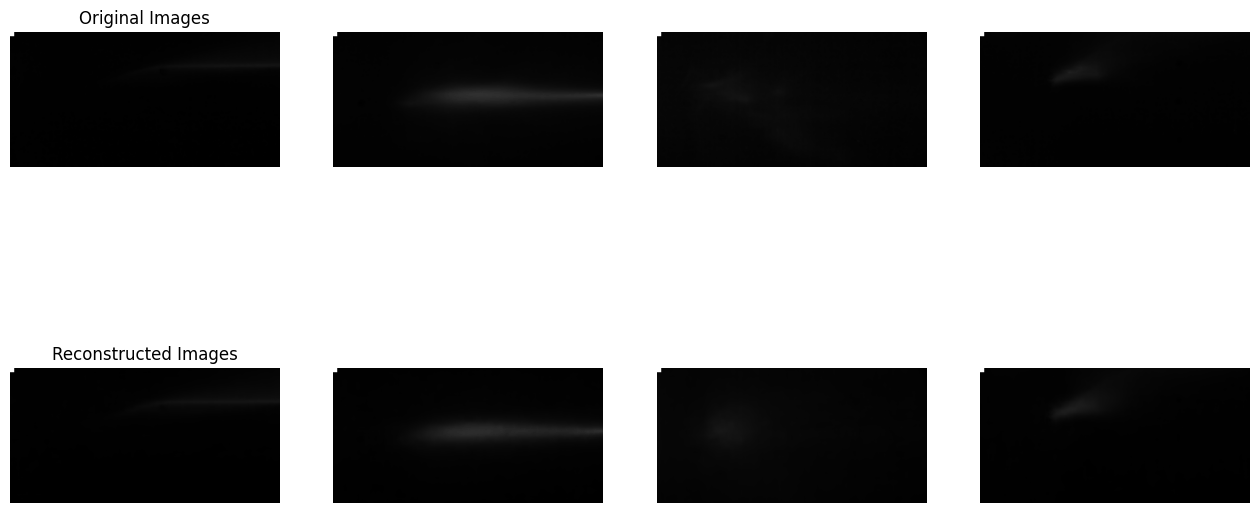

In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np
from vae import get_data, VAE, SimpleVAE

# Assuming VAE class is already defined or imported
# from your_model_file import VAE  # Import your VAE definition if it's in a separate file

# Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = SimpleVAE().to(device)
vae.load_state_dict(torch.load('models/vae_final.pth'))  # Load saved model
vae.eval()  # Set model to evaluation mode

# Function to visualize a batch of images and their reconstructions
def visualize_reconstruction(model, data_loader, num_images=4):
    # Get a batch of images
    model.eval()
    with torch.no_grad():
        for batch in data_loader:
            inputs = batch['image'].to(device)  # assuming the input key is 'image'
            recon_batch, _, _ = model(inputs)  # Forward pass (no need for mu, logvar in this case)
            break  # Only use the first batch for visualization

    # Select a few images from the batch
    inputs = inputs[:num_images]
    recon_batch = recon_batch[:num_images]

    # Move images back to CPU and convert to numpy arrays for plotting
    inputs = inputs.cpu()
    recon_batch = recon_batch.cpu()

    # Plot original images and reconstructed images side by side
    fig, axes = plt.subplots(2, num_images, figsize=(num_images * 4, 8))

    for i in range(num_images):
        # Original images
        axes[0, i].imshow(inputs[i][0].numpy(), cmap='gray')  # Assuming grayscale images (1 channel)
        axes[0, i].axis('off')

        # Reconstructed images
        axes[1, i].imshow((recon_batch[i][0].numpy() + 1) * 1000, cmap='gray')  # Assuming grayscale images (1 channel)
        axes[1, i].axis('off')

    axes[0, 0].set_title('Original Images')
    axes[1, 0].set_title('Reconstructed Images')
    plt.show()

# Assuming you have a function to load your data
# Example:
train_loader = get_data(batch_size=8)

# Call the function to visualize
visualize_reconstruction(vae, train_loader)